# Machine Learning Model on predicting Thyroid Recurrence
## About Dataset
#### Created by Jania
##### Database Link: https://www.kaggle.com/datasets/jainaru/thyroid-disease-data

1. Age: The age of the patient at the time of diagnosis or treatment
2. Gender: The gender of the patient (male or female)
3. Smoking: Whether the patient is a smoker or not
4. Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked)
5. Hx Radiotherapy: History of radiotherapy treatment for any condition.
6. Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
7. Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
8. Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region.
9. Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
10. Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
11. Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
12. T: Tumor classification based on its size and extent of invasion into nearby structures.
13. N: Nodal classification indicating the involvement of lymph nodes.
14. M: Metastasis classification indicating the presence or absence of distant metastases.
15. Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
16. Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.17.
17. Recurred: Indicates whether the cancer has recurred after initial treatment.

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

In [4]:
df = pd.read_csv("Thyroid_Diff.csv")

# Data Cleaning

In [6]:
# Changing all the categorical data into numbers
df = df.replace({'Yes': 1, 'No': 0})
# Replace all the adenopathy values first since they utilize no
df['Adenopathy'] = df['Adenopathy'].replace({'No': 0, 'Right': 1, 'Left': 2, 'Posterior': 3, 'Bilateral': 4, 'Extensive': 5})
# General Replacement
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 0})

# Specific Replacement

# Nominal Data
df['Thyroid Function'] = df['Thyroid Function'].replace({'Euthyroid': 0, 'Clinical Hyperthyroidism': 1, 'Subclinical Hyperthyroidism': 2, 'Clinical Hypothyroidism': 3, 'Subclinical Hypothyroidism': 4})
df['Physical Examination'] = df['Physical Examination'].replace({'Single nodular goiter-left': 0, 'Multinodular goiter': 1, 'Single nodular goiter-right': 2, 'Normal': 3, 'Diffuse goiter': 4})
df['Pathology'] = df['Pathology'].replace({'Micropapillary': 0, 'Follicular': 1, 'Papillary': 2, 'Hurthel cell': 3})
df['Focality'] = df['Focality'].replace({'Uni-Focal': 0, 'Multi-Focal': 1})

# Ordinal Data
df['Response'] = df['Response'].replace({'Indeterminate': 0, 'Structural Incomplete': 1, 'Biochemical Incomplete': 2, 'Biochemical': 3, 'Structural': 4, 'Excellent': 5})
df['Risk'] = df['Risk'].replace({'Low': 0, 'Intermediate': 1, 'High': 2})
df['Stage'] = df['Stage'].replace({'I': 0, 'II': 1, 'III': 2, 'IVA': 3, 'IVB': 4})
df['T'] = df['T'].replace({'T1a': 0, 'T1b': 1, 'N1a': 2, 'N1b': 3, 'T2': 4, 'T3a': 5, 'T3b': 6, 'T4a': 7, 'T4b': 8})
df['M'] = df['M'].replace({'M0': 0, 'M1': 1})
df['N'] = df['N'].replace({'N0': 0, 'N1a': 1, 'N1b': 2})

In [7]:
# Labeling data types
df = df.astype('int64')
df['Age'] = df['Age'].astype('int64')

# Renaming data
df.rename({'Recurred':'Outcome'}, axis=1, inplace=True)
df.rename({'Response':'Patient Response'}, axis=1, inplace=True)

In [8]:
# Labels
df = df.astype('int64')
df.rename({'Recurred':'Outcome'}, axis=1, inplace=True)
df['Outcome'] = df['Outcome'].astype('category')

In [9]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Patient Response,Outcome
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0,5,0
2,30,0,0,0,0,0,2,0,0,0,0,0,0,0,0,5,0
3,62,0,0,0,0,0,2,0,0,0,0,0,0,0,0,5,0
4,62,0,0,0,0,0,1,0,0,1,0,0,0,0,0,5,0


In [10]:
df.corr()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Patient Response,Outcome
Age,1.000000,0.186457,0.309536,0.134531,0.176588,0.051722,-0.093102,0.127511,-0.063155,0.223847,0.295556,0.182651,0.061243,0.235401,0.526862,-0.238226,0.258897
Gender,0.186457,1.000000,0.621886,0.175755,0.235865,0.053194,-0.158805,0.305191,0.083847,0.207634,0.295229,0.237453,0.238766,0.211540,0.250215,-0.241528,0.328189
Smoking,0.309536,0.621886,1.000000,0.252773,0.297874,0.020045,-0.185286,0.273971,0.087311,0.238494,0.374324,0.314260,0.204305,0.321233,0.426152,-0.242380,0.333243
Hx Smoking,0.134531,0.175755,0.252773,1.000000,0.261198,0.119171,0.042029,0.127557,0.008136,0.001204,0.138403,0.096251,0.044421,0.127209,0.262371,-0.056272,0.136073
Hx Radiothreapy,0.176588,0.235865,0.297874,0.261198,1.000000,-0.004802,-0.034578,0.169910,0.023613,0.102415,0.272056,0.160839,0.095535,0.430214,0.461901,-0.086343,0.174407
Thyroid Function,0.051722,0.053194,0.020045,0.119171,-0.004802,1.000000,0.065105,0.040728,-0.022108,0.050773,0.035399,0.000610,0.005700,-0.009705,0.066615,-0.005110,-0.033610
Physical Examination,-0.093102,-0.158805,-0.185286,0.042029,-0.034578,0.065105,1.000000,-0.124601,-0.073899,-0.194202,-0.129697,-0.168753,-0.078105,-0.139820,-0.094945,0.154677,-0.119520
Adenopathy,0.127511,0.305191,0.273971,0.127557,0.169910,0.040728,-0.124601,1.000000,0.212298,0.378697,0.612227,0.415122,0.751239,0.209229,0.312600,-0.421041,0.586010
Pathology,-0.063155,0.083847,0.087311,0.008136,0.023613,-0.022108,-0.073899,0.212298,1.000000,0.219614,0.202660,0.613919,0.247919,-0.001863,0.060261,-0.213234,0.182032
Focality,0.223847,0.207634,0.238494,0.001204,0.102415,0.050773,-0.194202,0.378697,0.219614,1.000000,0.450615,0.391920,0.376692,0.221931,0.331892,-0.330174,0.383776


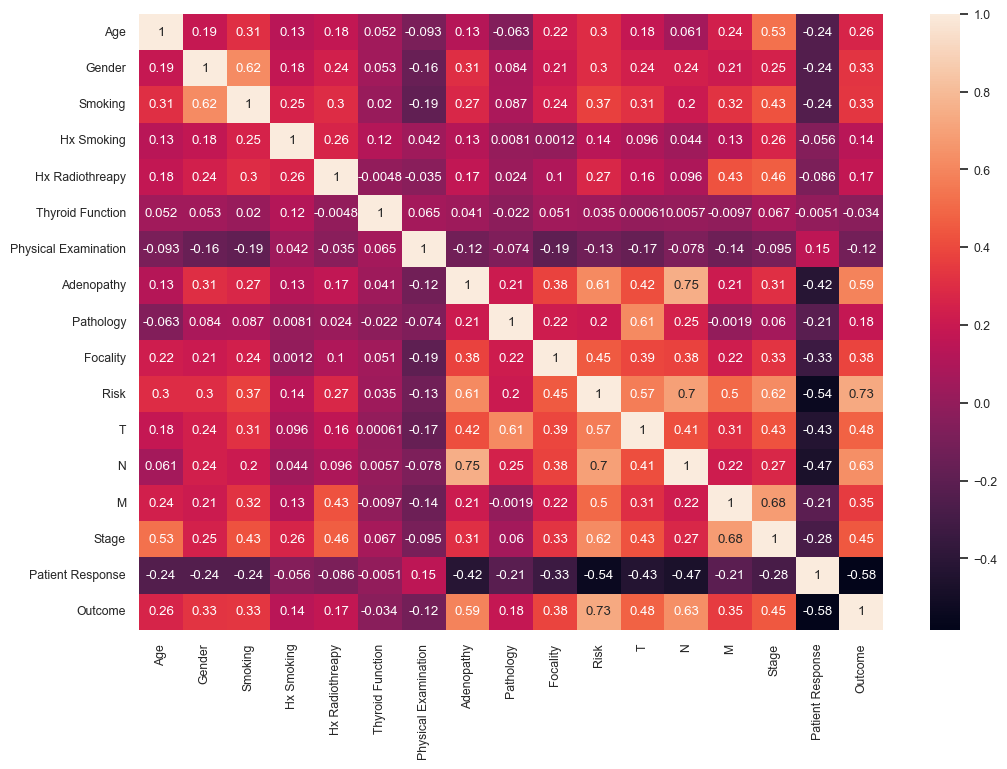

In [11]:
# Pearson's correlation (with heatmap)
plt.figure(figsize=(12,8))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(), annot=True);

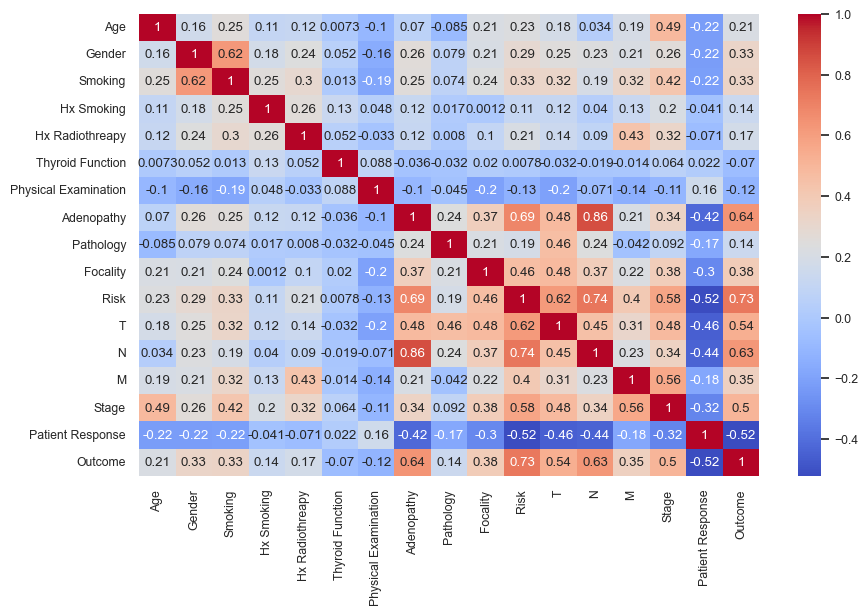

In [12]:
# Spearman's Rank or Spearman's Rho correlation
plt.figure(figsize=(10,6))
sns.set(font_scale=0.8)
plt.rcParams["axes.labelsize"] = 0.5
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="coolwarm"); # nonparametric correlation

In [13]:
# Phi K correlations for all variables
import phik
from phik import resources, report

In [14]:
df.phik_matrix()

interval columns not set, guessing: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Patient Response']


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Patient Response,Outcome
Age,1.000000,0.187444,0.450226,0.140800,0.365998,0.077321,0.000000,0.087727,0.164039,0.261631,0.370772,0.309218,0.000000,0.415841,0.686242,0.289578,0.436874
Gender,0.187444,1.000000,0.818591,0.240813,0.316130,0.021072,0.110761,0.414983,0.077706,0.300418,0.174422,0.282910,0.143454,0.292725,0.203754,0.456143,0.477676
Smoking,0.450226,0.818591,1.000000,0.357158,0.403106,0.000000,0.130019,0.365690,0.377523,0.345941,0.249921,0.410488,0.127795,0.452328,0.371037,0.491646,0.483032
Hx Smoking,0.140800,0.240813,0.357158,1.000000,0.335975,0.082703,0.000000,0.183110,0.136752,0.000000,0.093268,0.221329,0.000000,0.141118,0.271234,0.193033,0.178347
Hx Radiothreapy,0.365998,0.316130,0.403106,0.335975,1.000000,0.086172,0.000000,0.561132,0.149384,0.100800,0.229946,0.379826,0.047117,0.563704,0.401071,0.216787,0.224477
Thyroid Function,0.077321,0.021072,0.000000,0.082703,0.086172,1.000000,0.520010,0.000000,0.064984,0.000000,0.062957,0.135102,0.151195,0.000000,0.353511,0.000000,0.044988
Physical Examination,0.000000,0.110761,0.130019,0.000000,0.000000,0.520010,1.000000,0.306528,0.103148,0.290635,0.194845,0.177764,0.136868,0.090133,0.000000,0.114829,0.125797
Adenopathy,0.087727,0.414983,0.365690,0.183110,0.561132,0.000000,0.306528,1.000000,0.175151,0.521045,0.835649,0.444793,0.902421,0.358829,0.305984,0.535318,0.829297
Pathology,0.164039,0.077706,0.377523,0.136752,0.149384,0.064984,0.103148,0.175151,1.000000,0.351919,0.187675,0.700371,0.214309,0.258138,0.155983,0.403885,0.345766
Focality,0.261631,0.300418,0.345941,0.000000,0.100800,0.000000,0.290635,0.521045,0.351919,1.000000,0.281170,0.492488,0.227140,0.313444,0.301647,0.601096,0.555220


In [15]:
from phik.report import plot_correlation_matrix
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Patient Response']


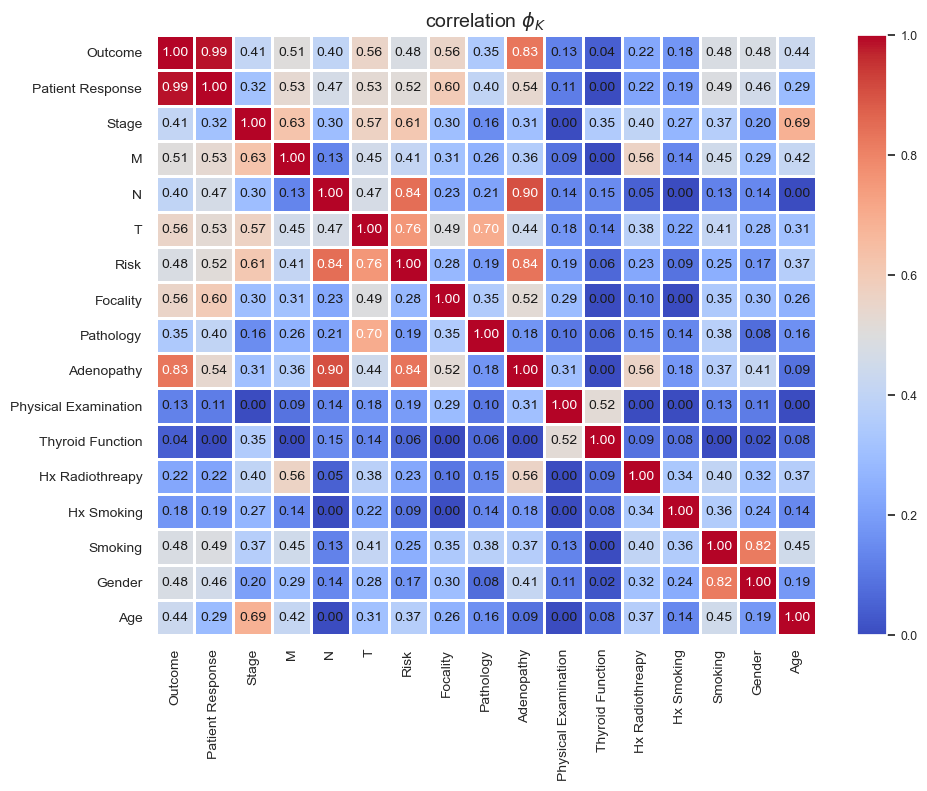

In [16]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="coolwarm", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.0, 
                        figsize=(10, 8))
plt.tight_layout()

# Unsually High Correlations

The Phi-K correlation shows that the correlation between response and outcome is signficantly high at 0.99 which indicates that they are far too correlated. Because of this the model should remove 'patient response' due to it may being a far too great predicting factor.

In [19]:
df = df.drop('Patient Response', axis=1)
df = df.drop('Risk', axis=1)


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    int64   
 2   Smoking               383 non-null    int64   
 3   Hx Smoking            383 non-null    int64   
 4   Hx Radiothreapy       383 non-null    int64   
 5   Thyroid Function      383 non-null    int64   
 6   Physical Examination  383 non-null    int64   
 7   Adenopathy            383 non-null    int64   
 8   Pathology             383 non-null    int64   
 9   Focality              383 non-null    int64   
 10  T                     383 non-null    int64   
 11  N                     383 non-null    int64   
 12  M                     383 non-null    int64   
 13  Stage                 383 non-null    int64   
 14  Outcome               383 non-null    category
dtypes: cat

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0
Gender,383.0,0.185379,0.389113,0.0,0.0,0.0,0.0,1.0
Smoking,383.0,0.127937,0.334457,0.0,0.0,0.0,0.0,1.0
Hx Smoking,383.0,0.073107,0.260653,0.0,0.0,0.0,0.0,1.0
Hx Radiothreapy,383.0,0.018277,0.134126,0.0,0.0,0.0,0.0,1.0
Thyroid Function,383.0,0.318538,0.933858,0.0,0.0,0.0,0.0,4.0
Physical Examination,383.0,1.224543,0.887212,0.0,1.0,1.0,2.0,4.0
Adenopathy,383.0,0.655352,1.310955,0.0,0.0,0.0,1.0,5.0
Pathology,383.0,1.728460,0.744543,0.0,2.0,2.0,2.0,3.0
Focality,383.0,0.355091,0.479167,0.0,0.0,0.0,1.0,1.0


In [22]:
df[df.duplicated()].count()

Age                     28
Gender                  28
Smoking                 28
Hx Smoking              28
Hx Radiothreapy         28
Thyroid Function        28
Physical Examination    28
Adenopathy              28
Pathology               28
Focality                28
T                       28
N                       28
M                       28
Stage                   28
Outcome                 28
dtype: int64

## Outlier Code
##### Because most of the variables are nominal or ordinal this only applies to the age

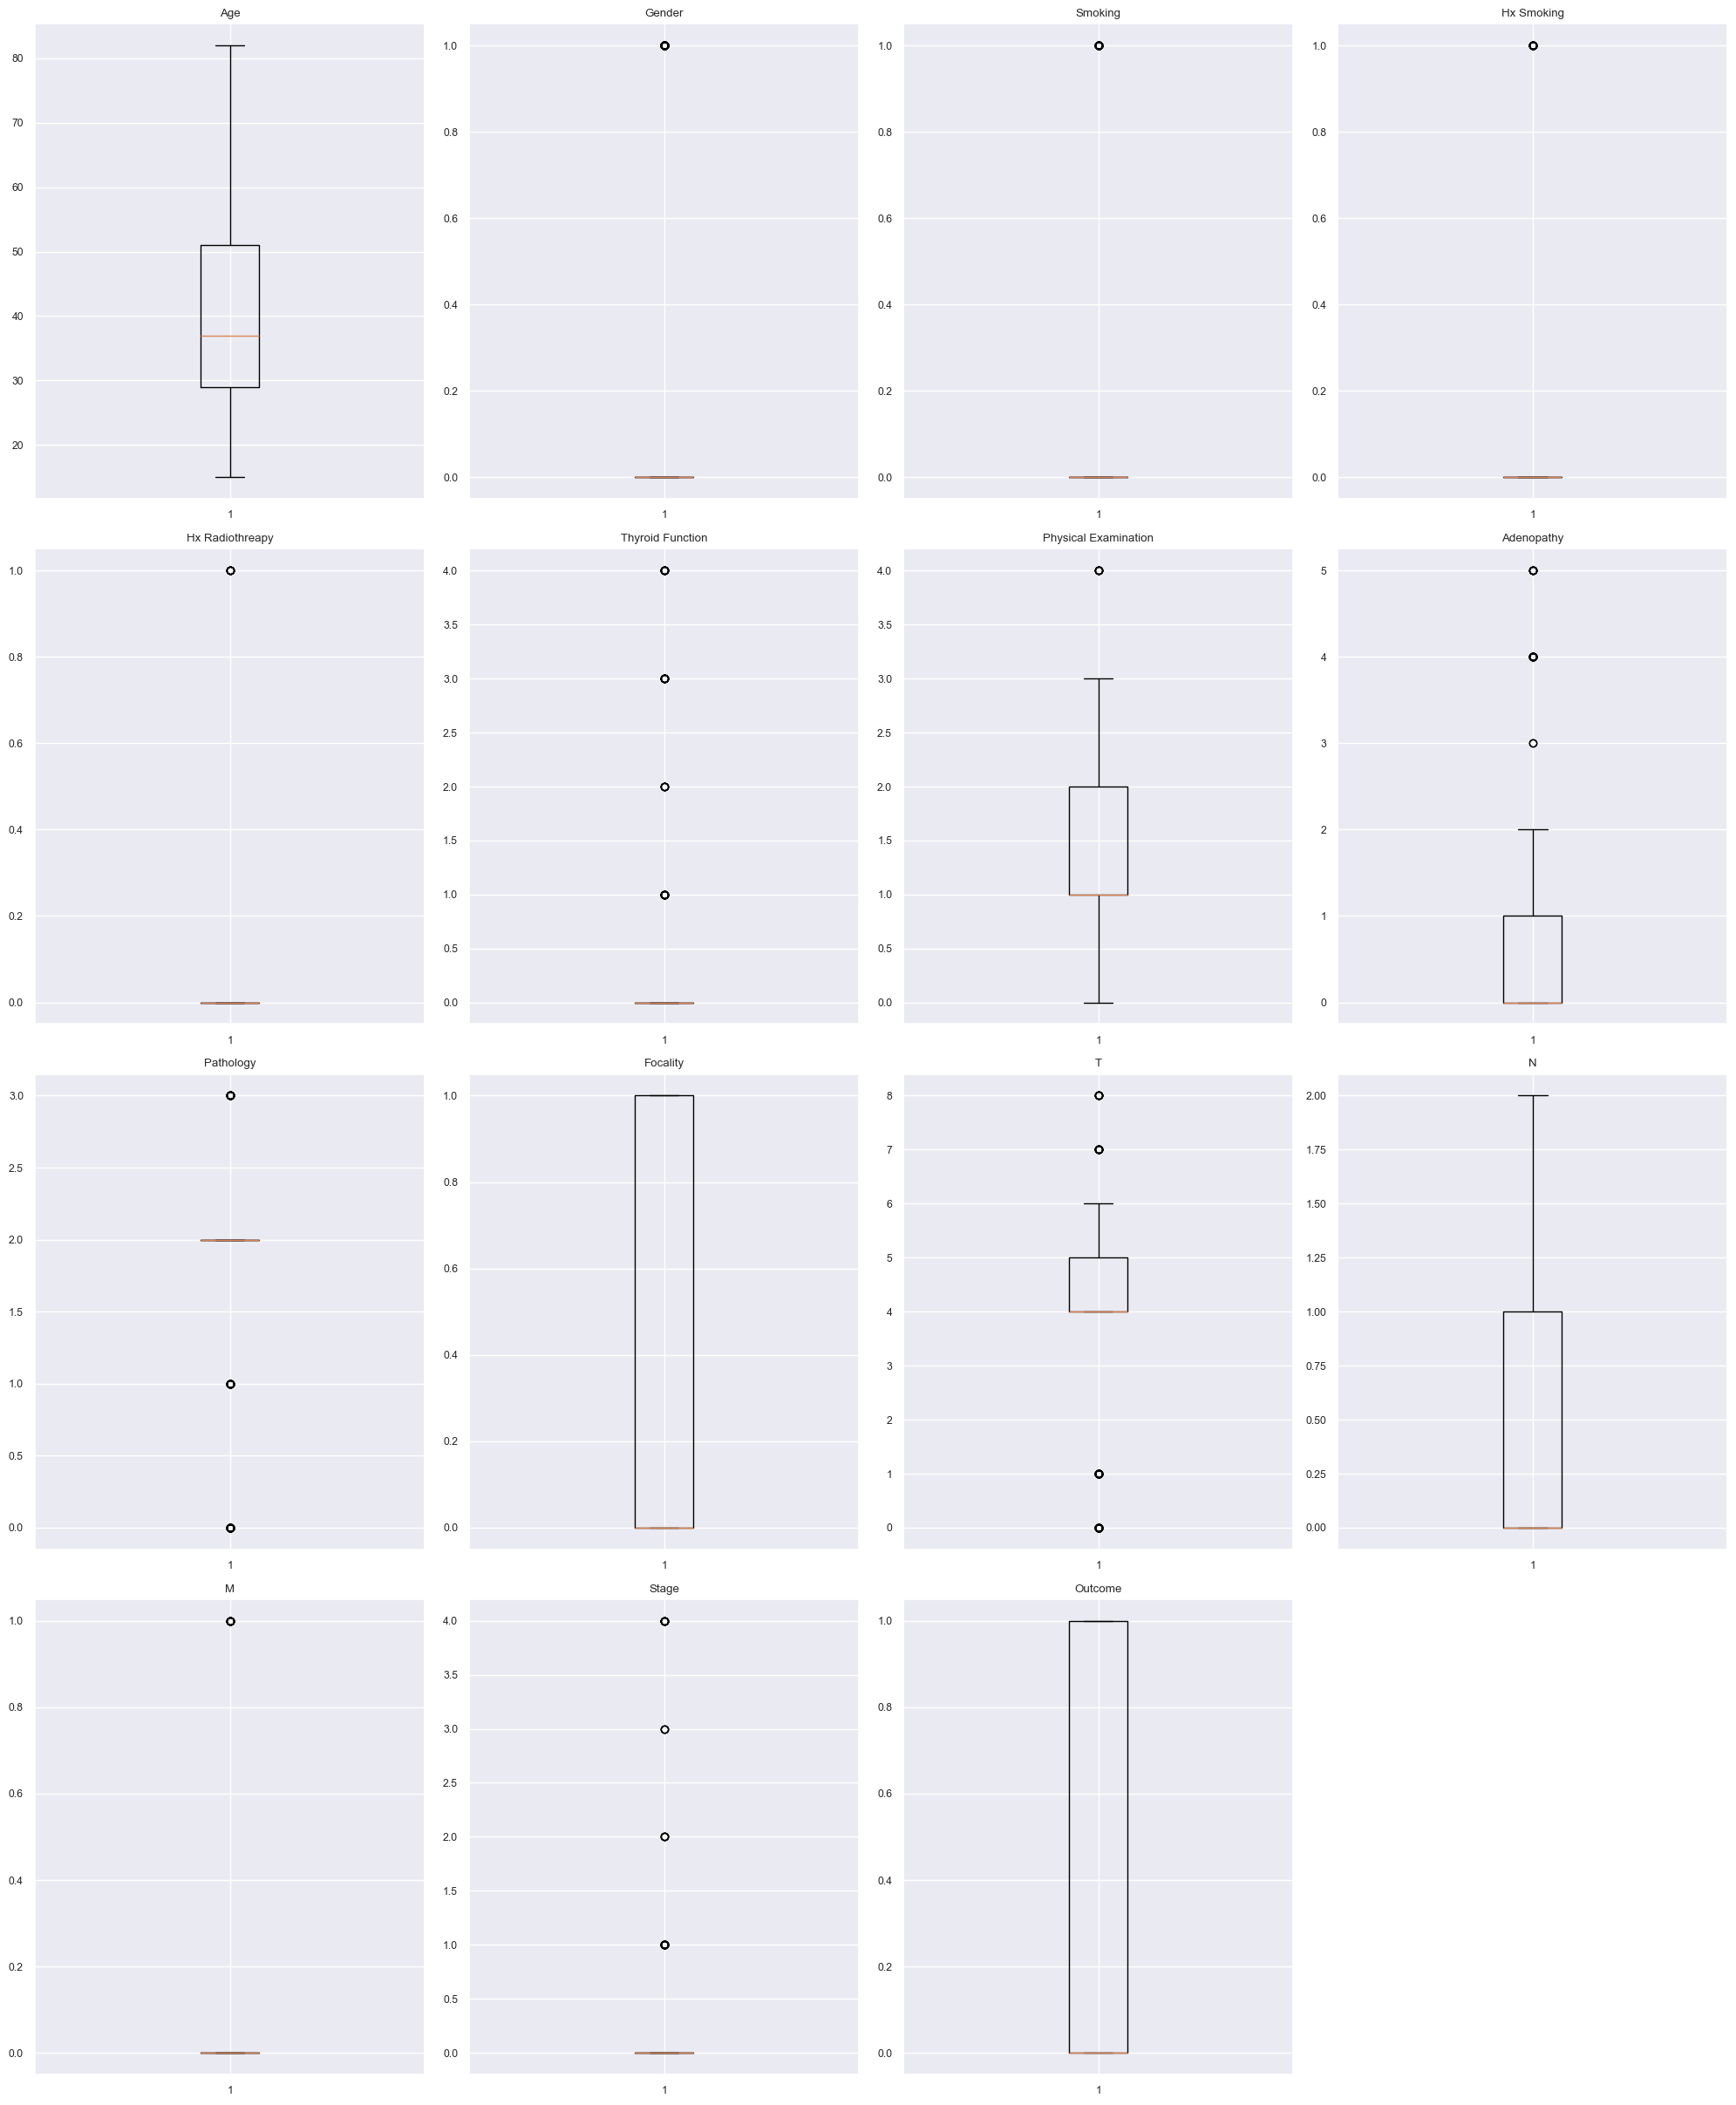

In [24]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(df):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)
                    
plt.show()

In [25]:
def treat_outliers(df,col):
    Q1=df[col].quantile(0.25) 
    Q3=df[col].quantile(0.75) 
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)                                                            
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df

In [26]:
 numerical_col = df.select_dtypes(include=np.number).columns.tolist()
# df = treat_outliers_all(df,numerical_col)

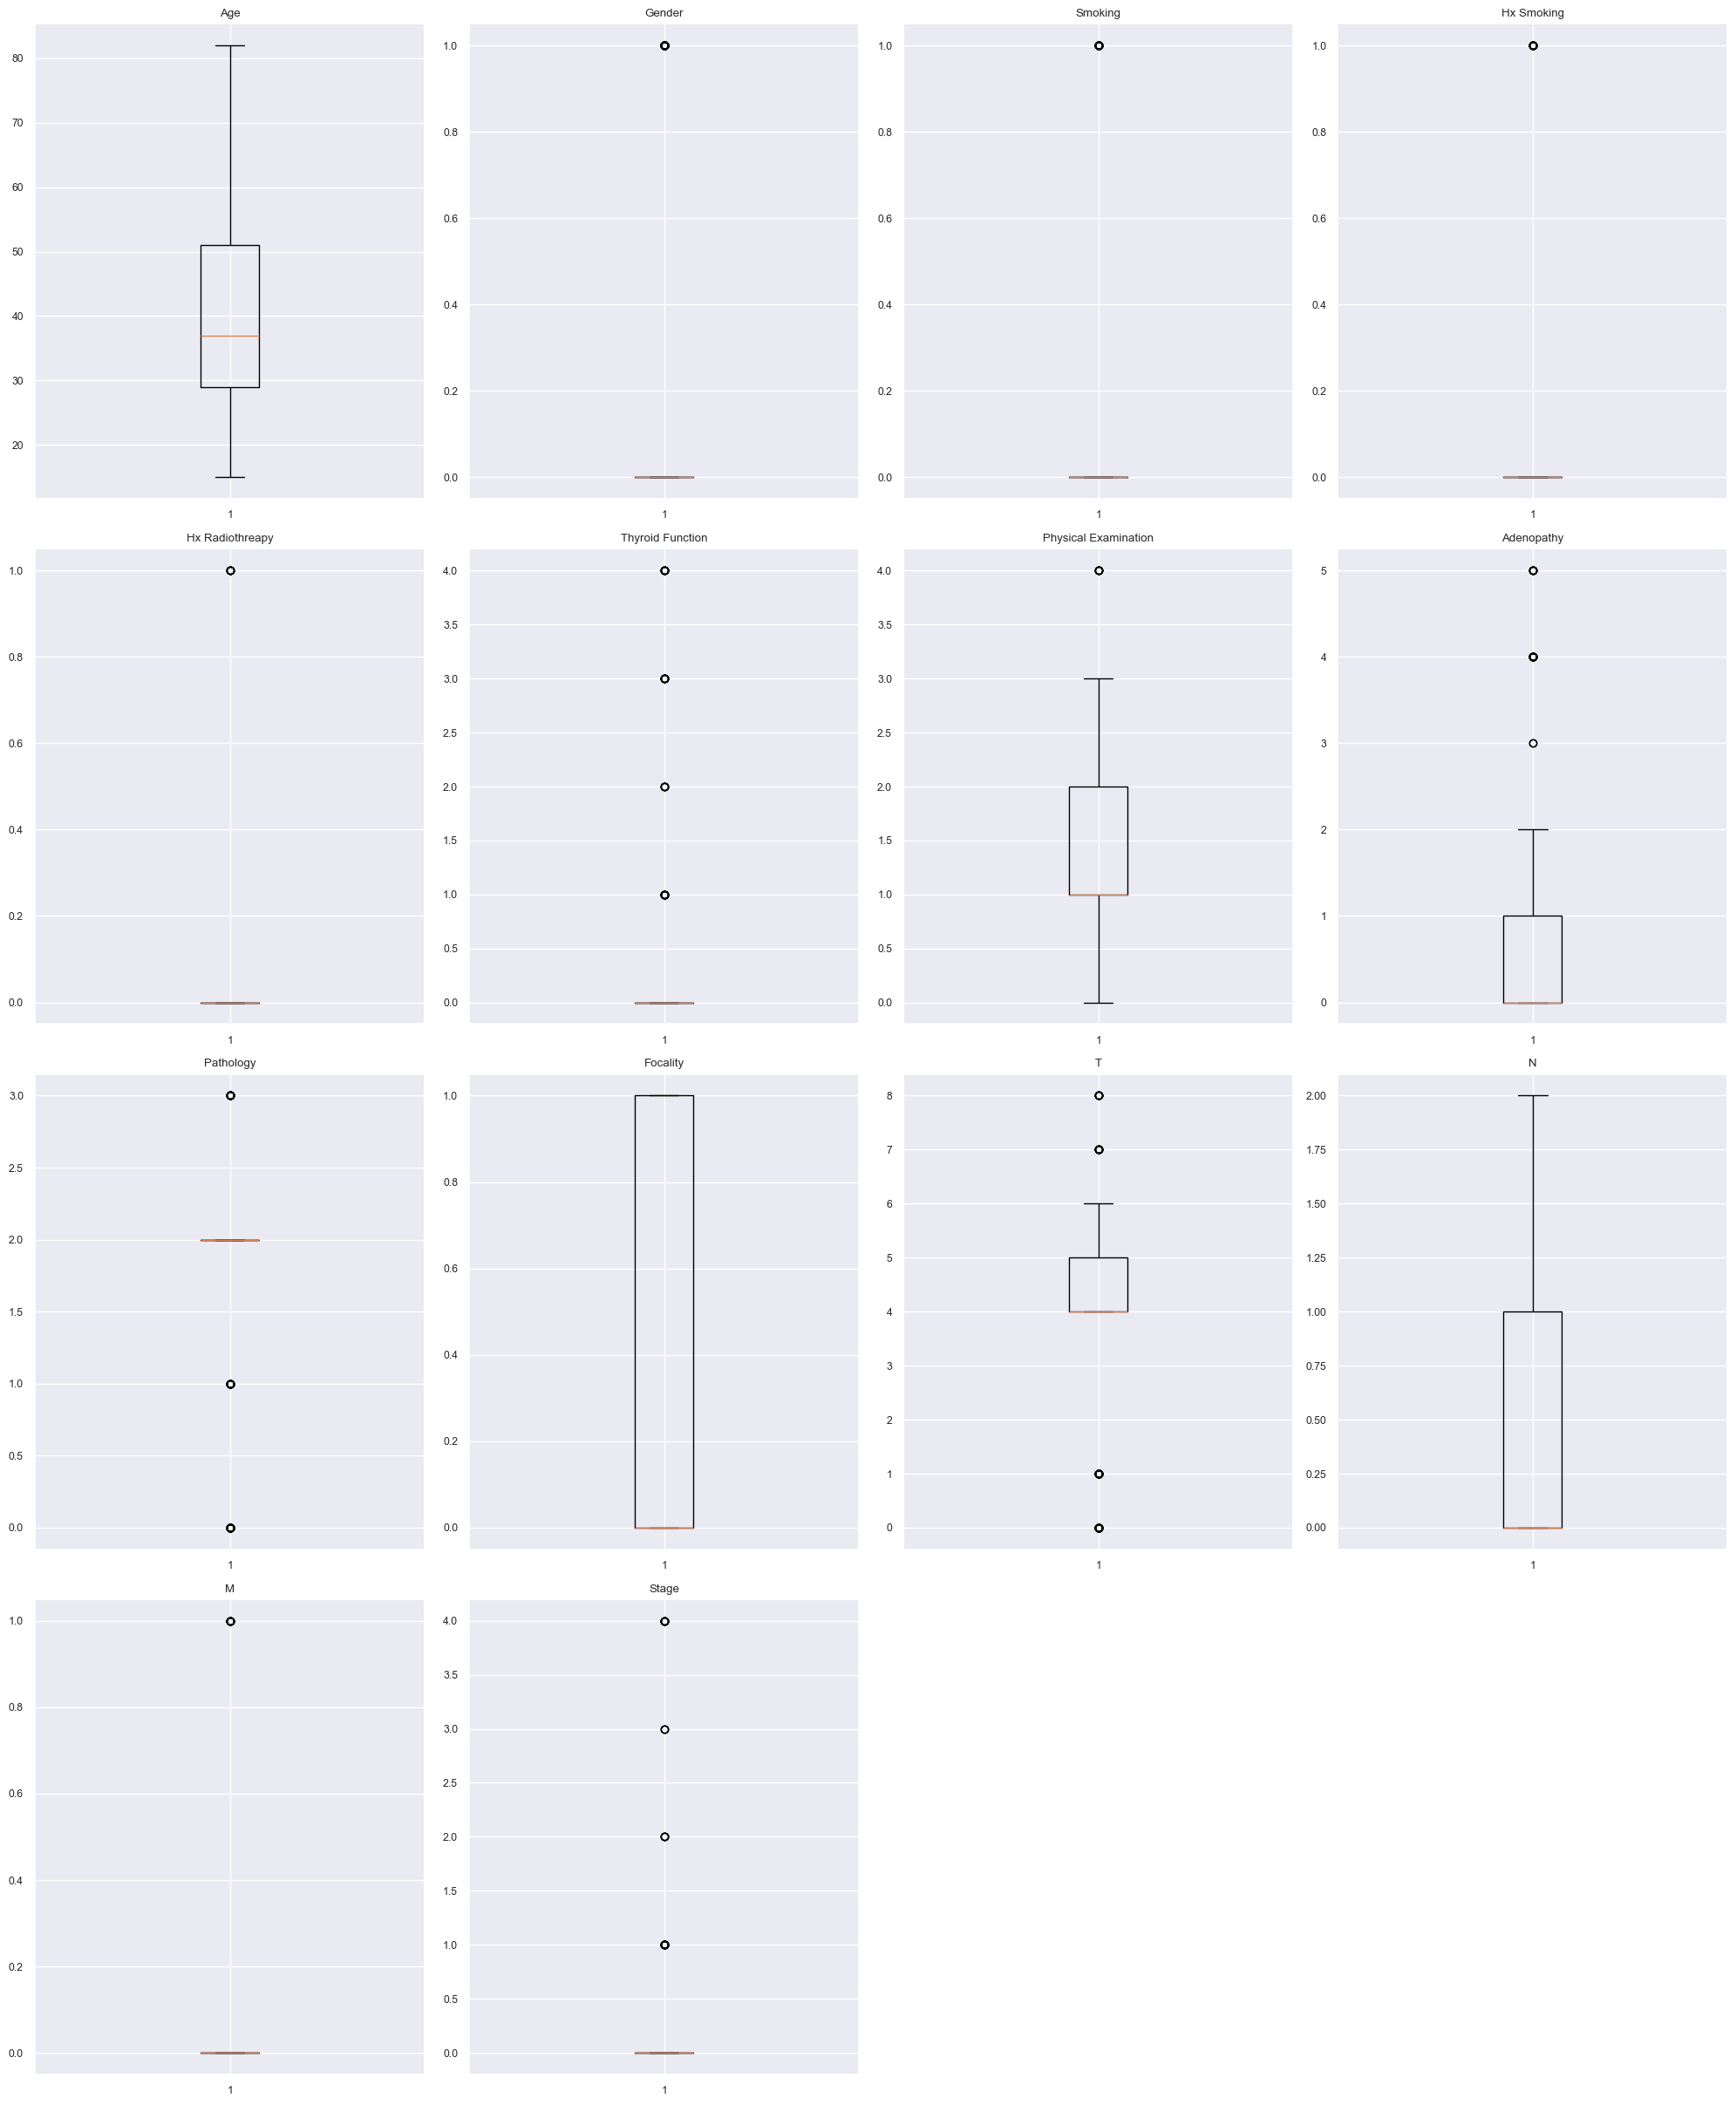

In [27]:
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

# Supervised Learning

In [29]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import stats, norm, skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets

In [30]:
# Make copy of data
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   383 non-null    int64   
 1   Gender                383 non-null    int64   
 2   Smoking               383 non-null    int64   
 3   Hx Smoking            383 non-null    int64   
 4   Hx Radiothreapy       383 non-null    int64   
 5   Thyroid Function      383 non-null    int64   
 6   Physical Examination  383 non-null    int64   
 7   Adenopathy            383 non-null    int64   
 8   Pathology             383 non-null    int64   
 9   Focality              383 non-null    int64   
 10  T                     383 non-null    int64   
 11  N                     383 non-null    int64   
 12  M                     383 non-null    int64   
 13  Stage                 383 non-null    int64   
 14  Outcome               383 non-null    category
dtypes: cat

### Splitting Data into Train and Test Sets

In [32]:
X = data.drop('Outcome',axis=1)    # Features
y = data['Outcome'].astype('int64') # Labels (Target or Outcome Variable)
# converting target to integers - since some functions might not work with bool type


In [33]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape)

(256, 14) (127, 14)


In [34]:
print(X_train.columns)


Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'T', 'N', 'M', 'Stage'],
      dtype='object')


In [35]:
data.dropna()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage,Outcome
0,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,0,0,1,0,0,1,0,0,0,0,0,0,0,0
2,30,0,0,0,0,0,2,0,0,0,0,0,0,0,0
3,62,0,0,0,0,0,2,0,0,0,0,0,0,0,0
4,62,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,0,2,1,2,0,8,2,1,4,1
379,81,1,1,0,1,0,1,5,2,1,8,2,1,4,1
380,72,1,1,1,0,0,1,4,2,1,8,2,1,4,1
381,61,1,1,1,1,1,1,5,3,1,8,2,0,3,1


### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15, 1:0.85},random_state=1)

# 2 commonly used splitting criteria are Gini impurity and information gain (entropy)
# Gini: measures the probability of misclassifying a randomly chosen element if it were randomly labeled
    # Would goal be to minimize or maximize the Gini impurity when making splits???
        # MINIMIZE
    
    
# Information Gain (Entropy): entropy measures impurity or uncertainty, while information gain quantifies reduction in entropy
    # Which do we want to minimize? Maximize?
        # MINIMIZE Entropy
        # MAXIMIZE Information Gain

In [38]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [39]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #Plotting the Heat Map
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

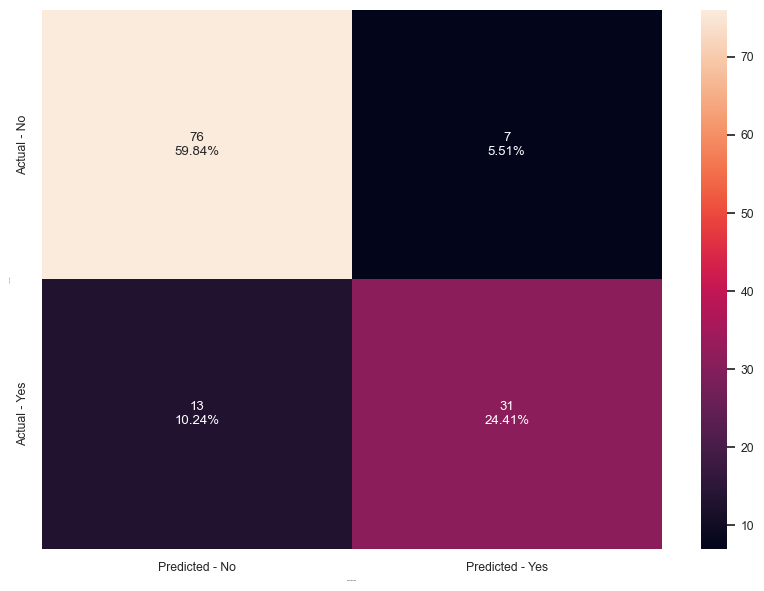

In [40]:
make_confusion_matrix(model,y_test)

In [41]:
y_train.value_counts(1)

Outcome
0    0.75
1    0.25
Name: proportion, dtype: float64

In [42]:
##  Function to calculate recall score
def get_recall_score(model):
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [43]:
print(X_test[X_test.isin(X_train)])

     Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
189  NaN     NaN      NaN         NaN              NaN               NaN   
381  NaN     NaN      NaN         NaN              NaN               NaN   
120  NaN     NaN      NaN         NaN              NaN               NaN   
207  NaN     NaN      NaN         NaN              NaN               NaN   
321  NaN     NaN      NaN         NaN              NaN               NaN   
..   ...     ...      ...         ...              ...               ...   
131  NaN     NaN      NaN         NaN              NaN               NaN   
343  NaN     NaN      NaN         NaN              NaN               NaN   
356  NaN     NaN      NaN         NaN              NaN               NaN   
273  NaN     NaN      NaN         NaN              NaN               NaN   
204  NaN     NaN      NaN         NaN              NaN               NaN   

     Physical Examination  Adenopathy  Pathology  Focality   T   N   M  Stage  
189    

In [44]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.7045454545454546


## Weirdly there is 100% recall on both the training set and test set which seems extremely strange

In [46]:
column_names = list(data.columns)
column_names.remove('Outcome')  # As this is the DV                
feature_names = column_names
print(feature_names)


['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'T', 'N', 'M', 'Stage']


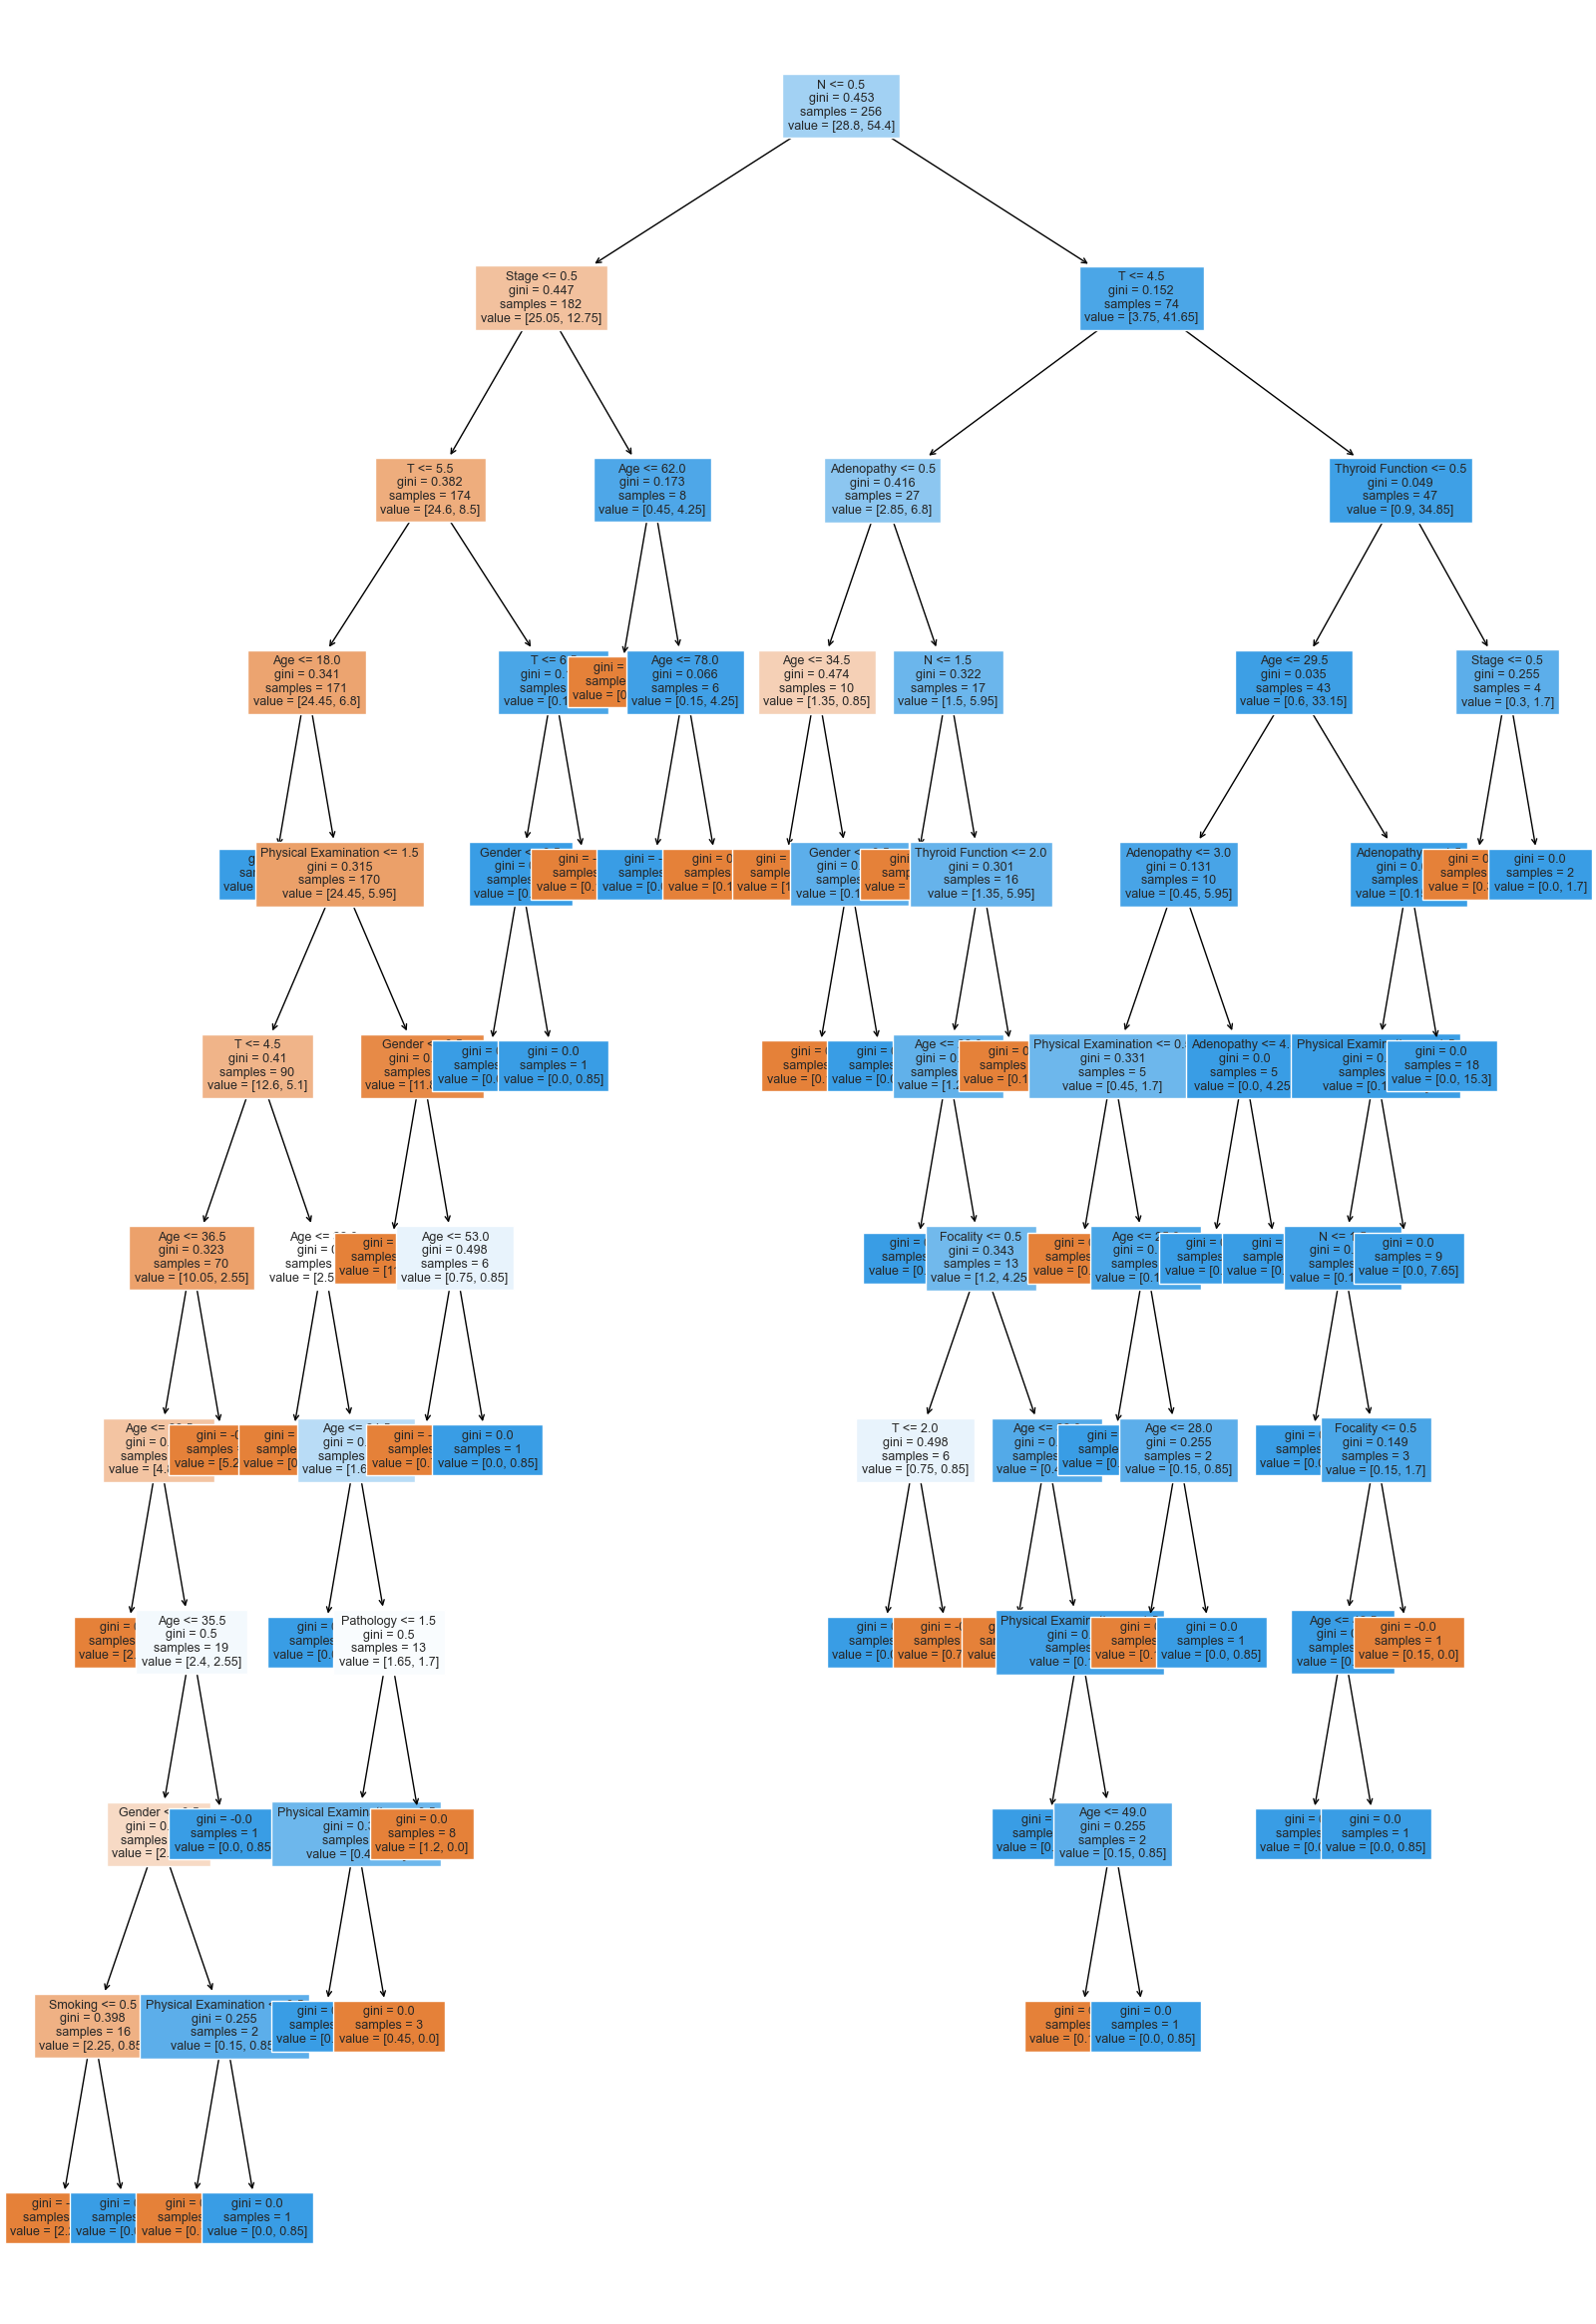

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
# Code below will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

## Graph shows that the depth is way too high as its hitting samples at 1

In [49]:
# Text report showing the rules of the decision tree

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- N <= 0.50
|   |--- Stage <= 0.50
|   |   |--- T <= 5.50
|   |   |   |--- Age <= 18.00
|   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |--- Age >  18.00
|   |   |   |   |--- Physical Examination <= 1.50
|   |   |   |   |   |--- T <= 4.50
|   |   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |   |--- weights: [2.40, 0.00] class: 0
|   |   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |   |--- Age <= 35.50
|   |   |   |   |   |   |   |   |   |--- Gender <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Smoking <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [2.25, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- Smoking >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |   |   |--- Gender >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Physical Examination <= 0.50
|   |   |   |   |   | 

In [50]:
# Importance of features in the tree building (The importance of a feature is computed as the 
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance)

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
N                     0.374164
Age                   0.202568
T                     0.120629
Stage                 0.105161
Physical Examination  0.057487
Gender                0.041042
Smoking               0.032762
Pathology             0.025570
Adenopathy            0.018709
Focality              0.014751
Thyroid Function      0.007156
Hx Smoking            0.000000
Hx Radiothreapy       0.000000
M                     0.000000


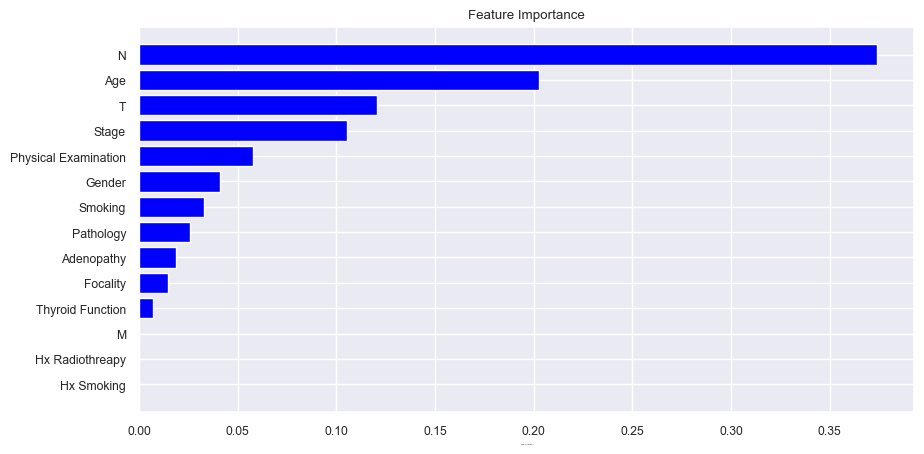

In [51]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV


In [53]:
# Choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(15,27),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.0001,0.001,0.001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=15,
                       max_features='log2', min_impurity_decrease=0.001,
                       random_state=1, splitter='random')

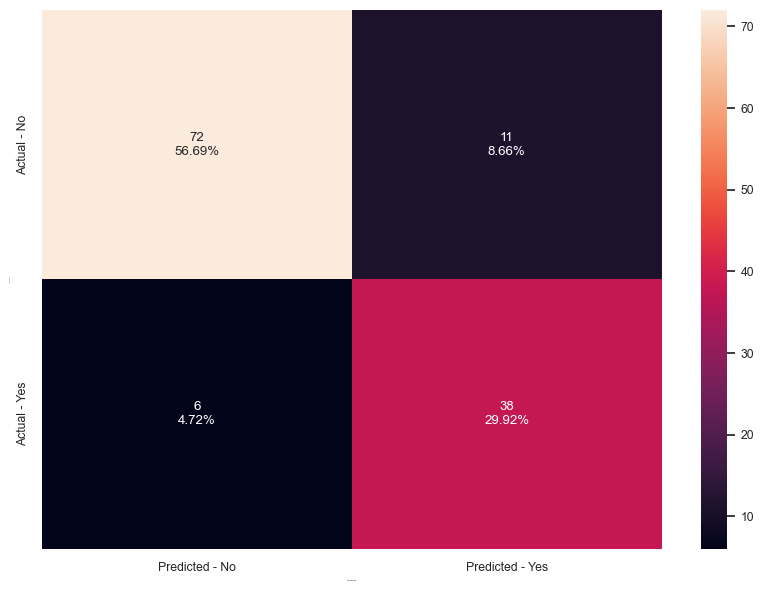

In [54]:
make_confusion_matrix(estimator,y_test)

In [55]:
get_recall_score(estimator)

Recall on training set :  0.8125
Recall on test set :  0.8636363636363636


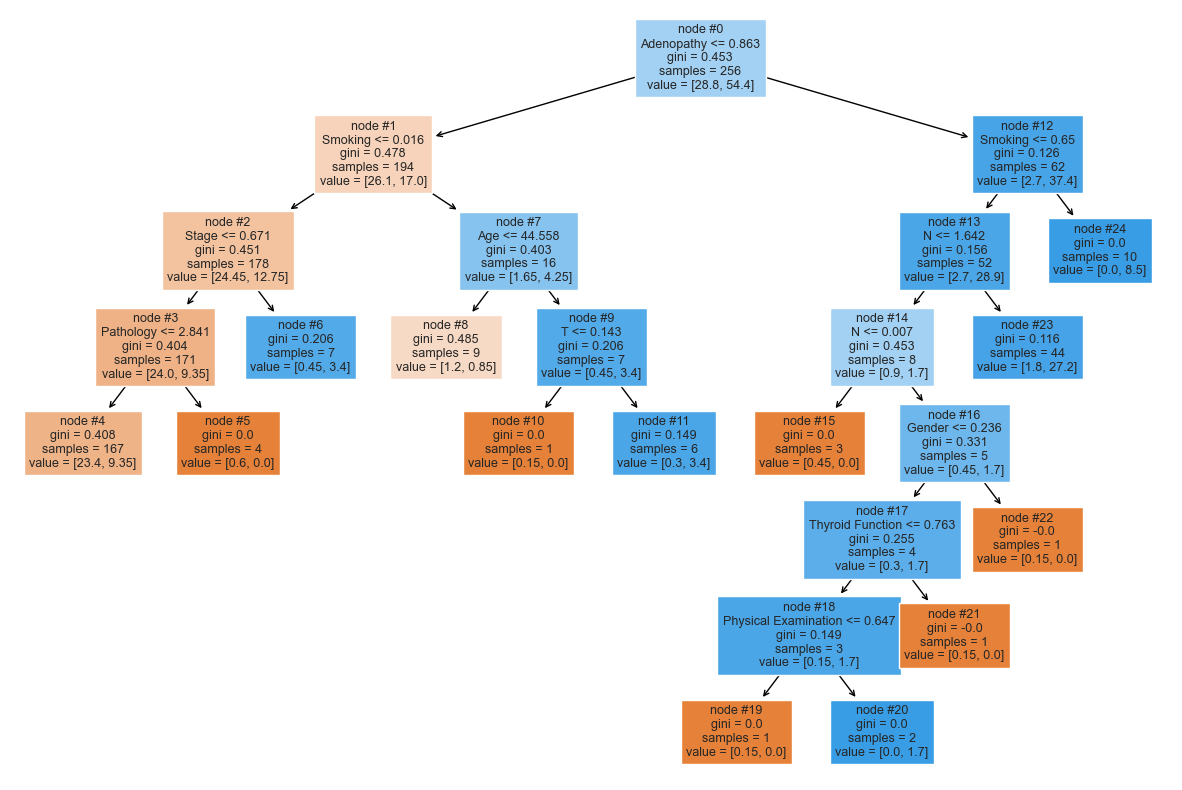

In [56]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [57]:
print(tree.export_text(estimator,feature_names=feature_names,show_weights=False))

|--- Adenopathy <= 0.86
|   |--- Smoking <= 0.02
|   |   |--- Stage <= 0.67
|   |   |   |--- Pathology <= 2.84
|   |   |   |   |--- class: 0
|   |   |   |--- Pathology >  2.84
|   |   |   |   |--- class: 0
|   |   |--- Stage >  0.67
|   |   |   |--- class: 1
|   |--- Smoking >  0.02
|   |   |--- Age <= 44.56
|   |   |   |--- class: 0
|   |   |--- Age >  44.56
|   |   |   |--- T <= 0.14
|   |   |   |   |--- class: 0
|   |   |   |--- T >  0.14
|   |   |   |   |--- class: 1
|--- Adenopathy >  0.86
|   |--- Smoking <= 0.65
|   |   |--- N <= 1.64
|   |   |   |--- N <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- N >  0.01
|   |   |   |   |--- Gender <= 0.24
|   |   |   |   |   |--- Thyroid Function <= 0.76
|   |   |   |   |   |   |--- Physical Examination <= 0.65
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Physical Examination >  0.65
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Thyroid Function >  0.76
|   |   |   |   |   |   |--- cla

In [58]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Adenopathy            0.647696
Stage                 0.134966
Smoking               0.083408
N                     0.045765
Age                   0.031599
Physical Examination  0.014835
T                     0.013101
Thyroid Function      0.012610
Gender                0.010850
Pathology             0.005169
Hx Smoking            0.000000
Hx Radiothreapy       0.000000
Focality              0.000000
M                     0.000000


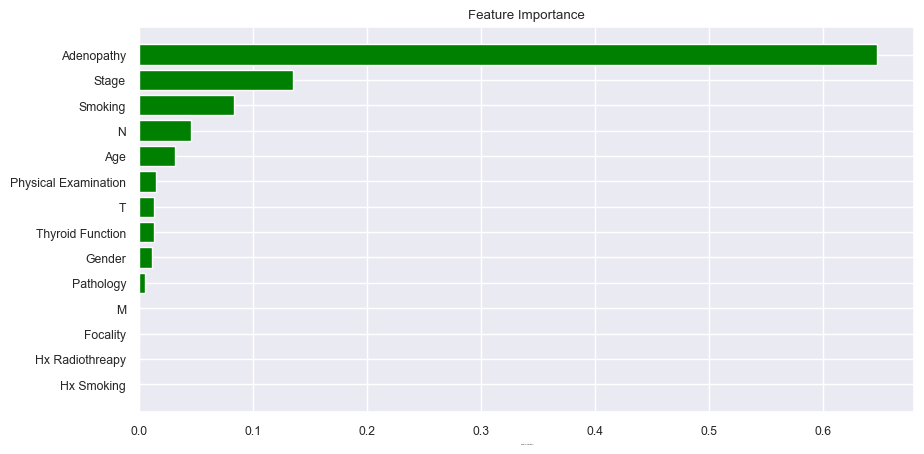

In [59]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [60]:
comparison_frame_dtree = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with Grid SearchCV'], 'Train_Recall':[1.0,0.986], 'Test_Recall':[0.974, 0.974]}) 
comparison_frame_dtree

,Model,Train_Recall,Test_Recall
0,Initial decision tree model,1.000,0.974
1,Decision tree with Grid SearchCV,0.986,0.974


### This code for some reason hsa the same test recall percentage for both of the models implying are using relatively the same criteria.

##### In this case it is better to have Type II error instead of Type 1 Error
Due to the fact that it is more harmful to a person that they believe they are healthy when in reality they are not. This may cause the person to continue their lifestyle that causes hyperthyrodism or skip doctor appointments which may be crucial towards their health

# Model Evaluation Criteria

In [64]:
# Libraries for different classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [65]:
data_2=df

In [66]:
X = data_2.drop('Outcome',axis=1)
y = data_2['Outcome'] 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# random state controls shuffling before applying split; shuffling is default; stratify allows shuffle by class
print(X_train.shape, X_test.shape)

(268, 14) (115, 14)


In [68]:
X_train.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage
85,25,0,0,1,1,0,2,0,2,0,1,0,0,0
58,23,0,0,0,0,1,0,0,2,0,1,0,0,0
349,68,1,1,1,0,4,0,4,2,1,6,2,0,2
224,20,1,0,0,0,0,2,1,2,0,4,0,0,0
242,56,1,0,0,0,0,1,0,2,0,4,0,0,0


In [69]:
X_test.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,T,N,M,Stage
189,42,0,0,0,0,0,1,0,2,0,4,0,0,0
381,61,1,1,1,1,1,1,5,3,1,8,2,0,3
120,37,0,0,0,0,0,2,0,2,0,4,0,0,0
207,17,0,0,0,0,0,1,1,2,0,4,2,0,0
321,62,0,0,0,0,0,1,1,2,1,5,2,0,1


In [70]:
y_train.head()

85     0
58     0
349    1
224    1
242    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [71]:
y_test.head()

189    0
381    1
120    0
207    0
321    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [72]:
X_train.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'T', 'N', 'M', 'Stage'],
      dtype='object')

## Decision Tree

In [74]:
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

# Parameters:
parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Scoring method used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set to the optimal combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.001,
                       min_samples_leaf=7, random_state=1)

In [75]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returns the list with train and test scores

In [76]:
# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy on training set :  1.0
Accuracy on test set :  0.7478260869565218
Recall on training set :  1.0
Recall on test set :  0.6410256410256411
Precision on training set :  1.0
Precision on test set :  0.625
F1-Score on training set :  1.0
F1-Score on test set :  0.6329113924050633


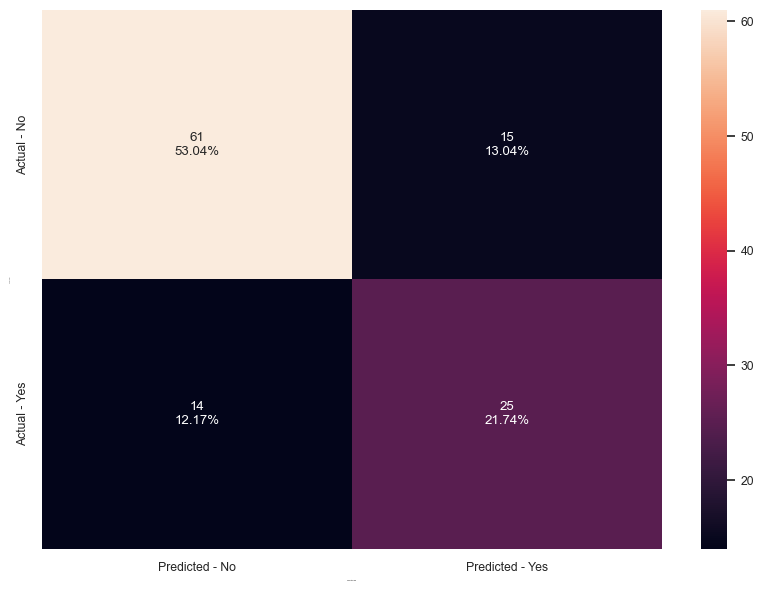

In [77]:
# Fit the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

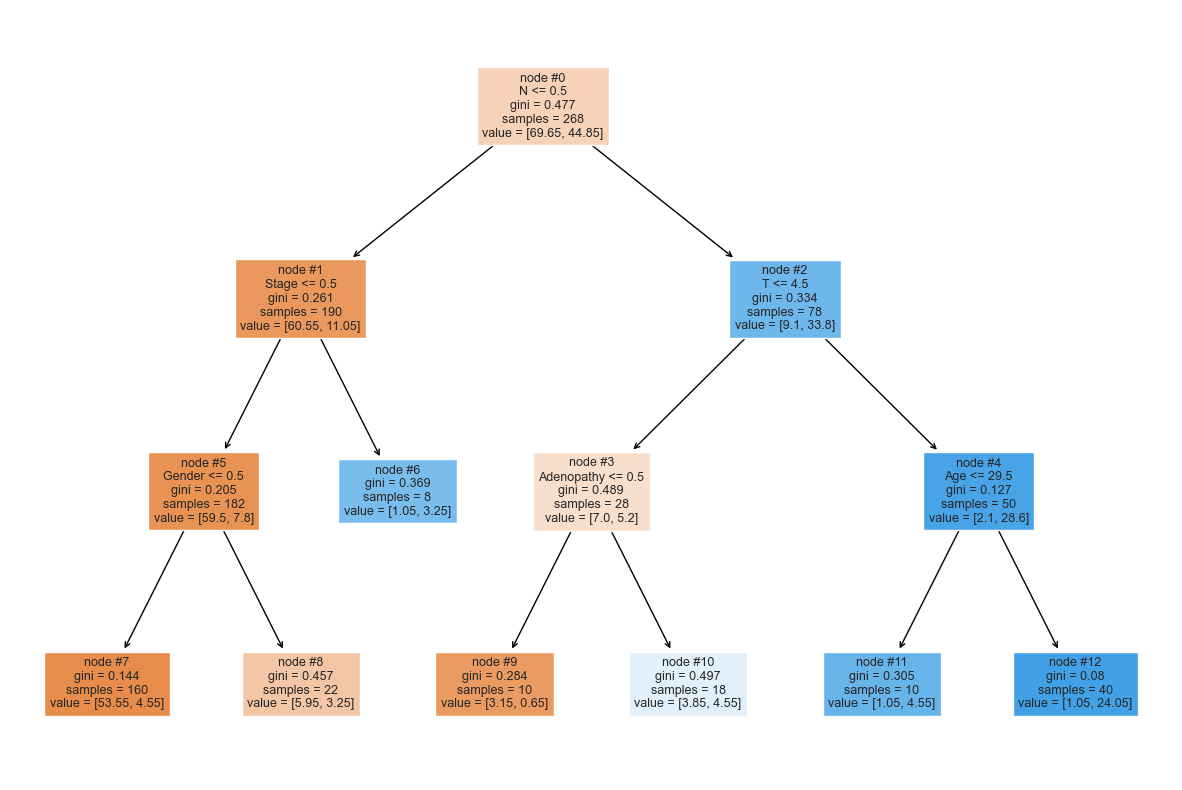

In [78]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(dtree_estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

## Random Forest

Accuracy on training set :  1.0
Accuracy on test set :  0.8608695652173913
Recall on training set :  1.0
Recall on test set :  0.6923076923076923
Precision on training set :  1.0
Precision on test set :  0.8709677419354839
F1-Score on training set :  1.0
F1-Score on test set :  0.7714285714285716


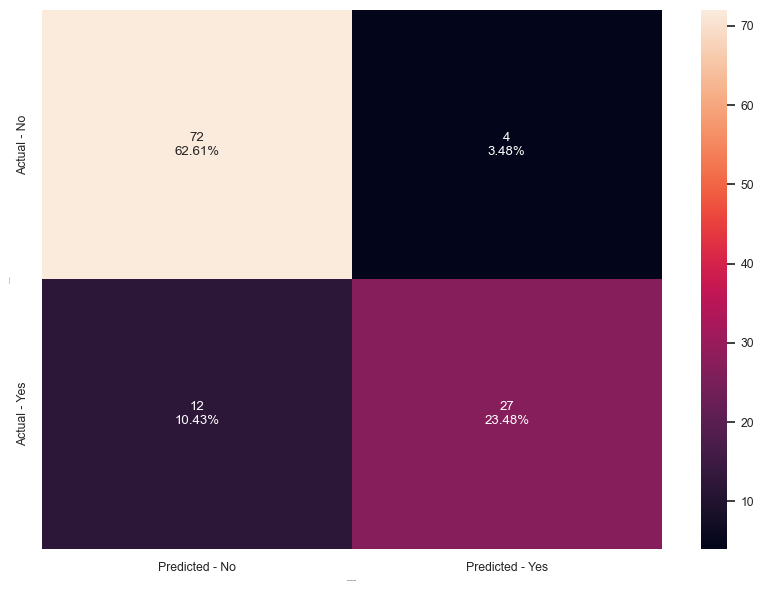

In [80]:
# Fit the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(rf_estimator)

# Create the confusion matrix
make_confusion_matrix(rf_estimator,y_test)

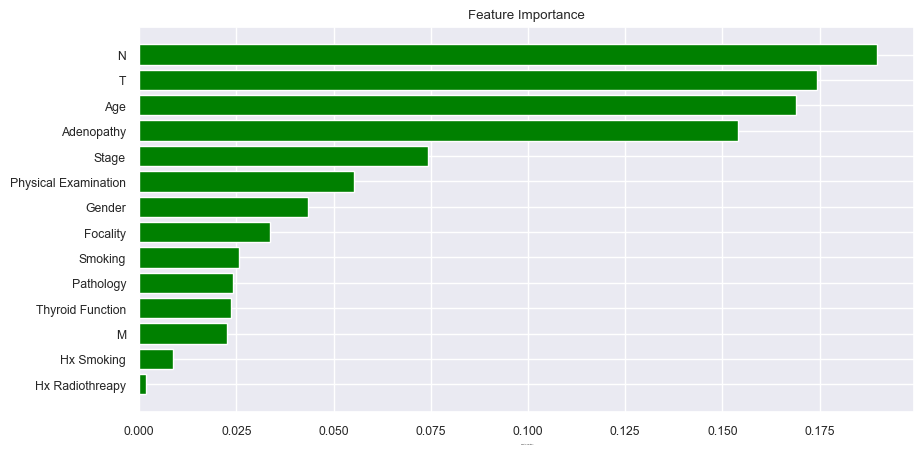

In [81]:
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Bagging Classifier

Accuracy on training set :  0.9813432835820896
Accuracy on test set :  0.8347826086956521
Recall on training set :  0.9420289855072463
Recall on test set :  0.6923076923076923
Precision on training set :  0.9848484848484849
Precision on test set :  0.7941176470588235
F1-Score on training set :  0.962962962962963
F1-Score on test set :  0.7397260273972601


DecisionTreeClassifier()

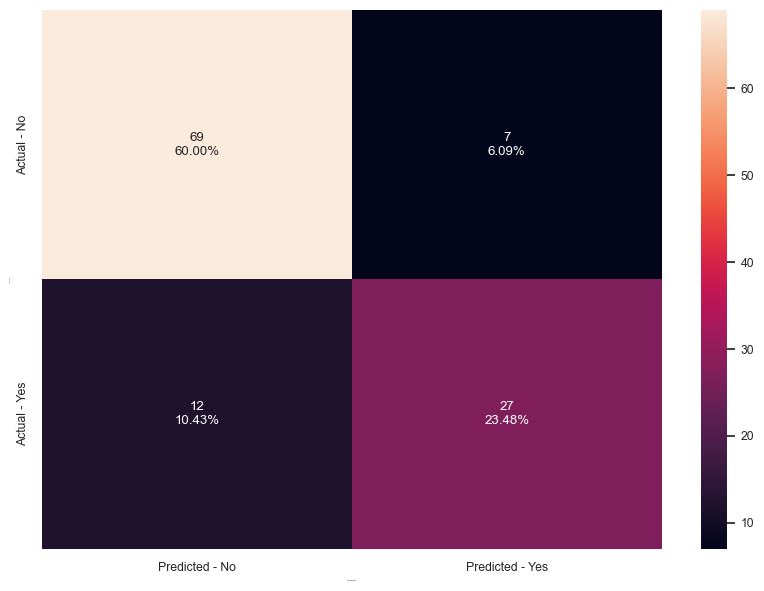

In [83]:
# Fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

# Calculate metrics
get_metrics_score(bagging_classifier)

# Create the confusion matrix
make_confusion_matrix(bagging_classifier,y_test)

# Classifier
bg_estimator = bagging_classifier.estimator_
bg_estimator.fit(X_train,y_train)

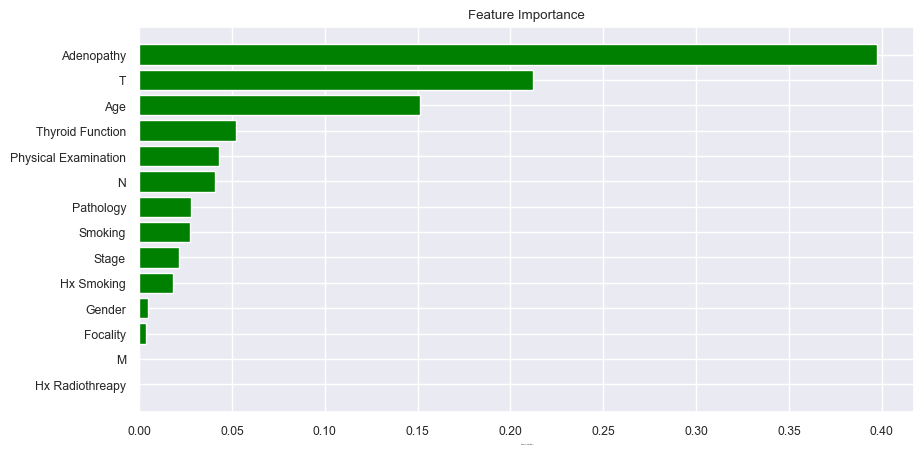

In [84]:
importances = bg_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Tuned Decision Tree

In [86]:
%%time
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {'max_depth': np.arange(2,10), 
              'min_samples_leaf': [5, 7, 10, 15],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

dtree_tuned = grid_obj.best_estimator_

dtree_tuned.fit(X_train, y_train)


CPU times: total: 844 ms
Wall time: 3.4 s


DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.001,
                       min_samples_leaf=7, random_state=1)

Accuracy on training set :  0.8768656716417911
Accuracy on test set :  0.8782608695652174
Recall on training set :  0.8115942028985508
Recall on test set :  0.8717948717948718
Precision on training set :  0.7368421052631579
Precision on test set :  0.7906976744186046
F1-Score on training set :  0.7724137931034482
F1-Score on test set :  0.8292682926829267


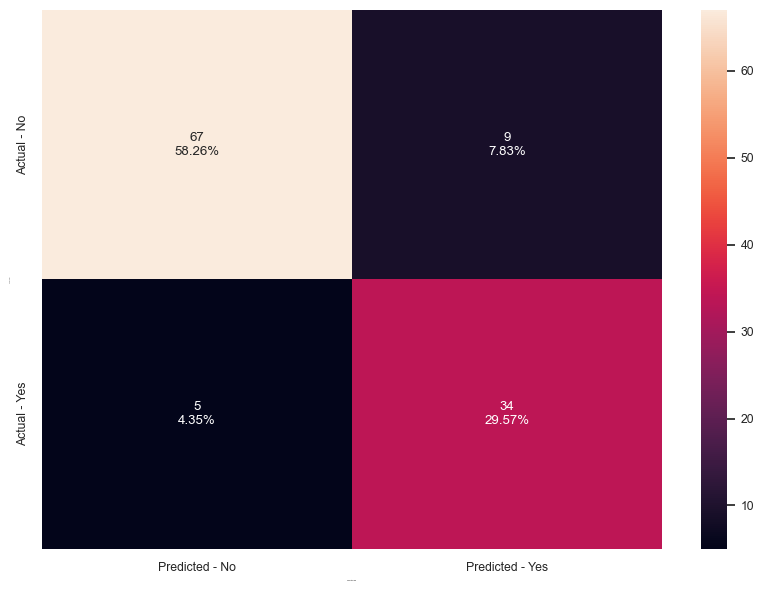

In [87]:
get_metrics_score(dtree_tuned)

make_confusion_matrix(dtree_tuned,y_test)

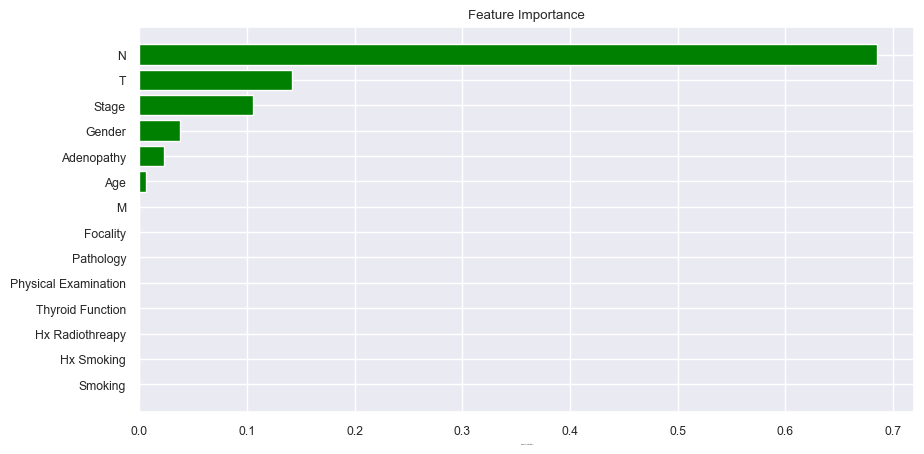

In [88]:
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Tuned Random Forest 

In [ ]:
%%time 
# captures time it takes to run this block of code

# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.35,1:0.65},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)


rf2_estimator = rf_tuned.estimator_
rf2_estimator.fit(X_train,y_train)

In [ ]:
#Calculating different metrics
get_metrics_score(rf_tuned)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,y_test)

In [ ]:
importances = rf2_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Tuned Bagging Classifier

In [ ]:
%%time
bagging_tuned = BaggingClassifier(random_state=1)

parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)
bagging_tuned = grid_obj.best_estimator_

bagging_tuned.fit(X_train, y_train)
bgt_estimator = bagging_tuned.estimator_
bgt_estimator.fit(X_train,y_train)

In [ ]:
get_metrics_score(bagging_tuned)

make_confusion_matrix(bagging_tuned,y_test)

In [ ]:
importances = bgt_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Comparison

In [ ]:
# Identify the models to compare
models = [d_tree, dtree_tuned, rf_estimator, bagging_classifier, bagging_tuned]

# Define empty lists to add results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# Loop through all identified models to get the metrics score (i.e., Accuracy, Recall, Precision, and F1)
for model in models:
    
    j = get_metrics_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [ ]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Random Forest',
                                          'Bagging Classifier','Tuned Bagging Classifier'], 'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test, 'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'F1_Train':f1_train, 'F1_Test':f1_test})

#Sort models in decreasing order of test recall
comparison_frame.sort_values(by='F1_Test',ascending=False)

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
print (pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Relative Importance"], index = X_train.columns).sort_values(by = 'Relative Importance', ascending = False))


## Extra Plots to Visualize 

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape)

In [ ]:
plt.hist(df['Age'], color='b');

In [ ]:
sns.distplot(df['Age'], color='r', rug=True);

In [ ]:
sns.violinplot(df['Age'],color='y');

In [ ]:
sns.pairplot(df);

In [ ]:
# Plot histograms to check the distribution of each numeric variable
from scipy.stats import norm
all_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(df[all_col[i]])
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    
plt.show()

# Citations
Borzooei,Shiva and Tarokhian,Aidin. (2023). Differentiated Thyroid Cancer Recurrence. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J.